In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [18]:
d = pd.read_csv("clean.csv")
from dolwick_project import splitdate
from dolwick_project import test_splitdate
pd.options.display.max_rows=20
ymd = splitdate.splitdate(d, d['Date'])
print(ymd)
#testing that the function splitdate worked as it should
test_splitdate.tsd()

            Date  Mileage time_corr   pace_min  year month day
0     2009-04-25     3.10   0:29:38   9.559140  2009    04  25
1     2009-11-21     3.10   0:22:51   7.370968  2009    11  21
2     2010-01-04     1.30   0:17:00  13.076923  2010    01  04
3     2010-01-05     2.60   0:28:00  10.769231  2010    01  05
4     2010-01-07     2.60   0:28:00  10.769231  2010    01  07
5     2010-01-11     1.30       NaN        NaN  2010    01  11
6     2010-01-14     2.60   0:26:00  10.000000  2010    01  14
7     2010-01-16     4.05   0:35:48   8.839506  2010    01  16
8     2010-01-19     2.60   0:24:00   9.230769  2010    01  19
9     2010-01-25     2.66   0:24:15   9.116541  2010    01  25
...          ...      ...       ...        ...   ...   ...  ..
2404  2020-01-19     9.61   1:04:44   6.736039  2020    01  19
2405  2020-01-20     6.68   0:50:00   7.485030  2020    01  20
2406  2020-01-21     5.00   0:35:53   7.176667  2020    01  21
2407  2020-01-22     6.11   0:43:23   7.100382  2020   

In [63]:
ymd['wPace'] = (ymd['Mileage']**(1/2))*(10/(ymd['pace_min']**2))
print(ymd)

            Date  Mileage time_corr   pace_min  year month day     wPace  \
0     2009-04-25     3.10   0:29:38   9.559140  2009    04  25  0.192683   
1     2009-11-21     3.10   0:22:51   7.370968  2009    11  21  0.324065   
2     2010-01-04     1.30   0:17:00  13.076923  2010    01  04  0.066675   
3     2010-01-05     2.60   0:28:00  10.769231  2010    01  05  0.139033   
4     2010-01-07     2.60   0:28:00  10.769231  2010    01  07  0.139033   
5     2010-01-11     1.30       NaN        NaN  2010    01  11       NaN   
6     2010-01-14     2.60   0:26:00  10.000000  2010    01  14  0.161245   
7     2010-01-16     4.05   0:35:48   8.839506  2010    01  16  0.257556   
8     2010-01-19     2.60   0:24:00   9.230769  2010    01  19  0.189239   
9     2010-01-25     2.66   0:24:15   9.116541  2010    01  25  0.196237   
...          ...      ...       ...        ...   ...   ...  ..       ...   
2404  2020-01-19     9.61   1:04:44   6.736039  2020    01  19  0.683207   
2405  2020-0

In [64]:
ymd['wPace'].describe()

count    1844.000000
mean        0.459912
std         0.139354
min         0.066675
25%         0.357990
50%         0.458175
75%         0.541221
max         0.969849
Name: wPace, dtype: float64

(array([ 14.,  74., 275., 419., 485., 332., 143.,  65.,  26.,  11.]),
 array([0.06667462, 0.15699201, 0.24730941, 0.3376268 , 0.4279442 ,
        0.5182616 , 0.60857899, 0.69889639, 0.78921378, 0.87953118,
        0.96984857]),
 <a list of 10 Patch objects>)

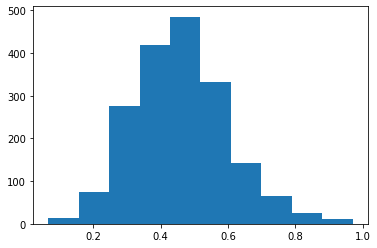

In [68]:
plt.hist(ymd['wPace'])

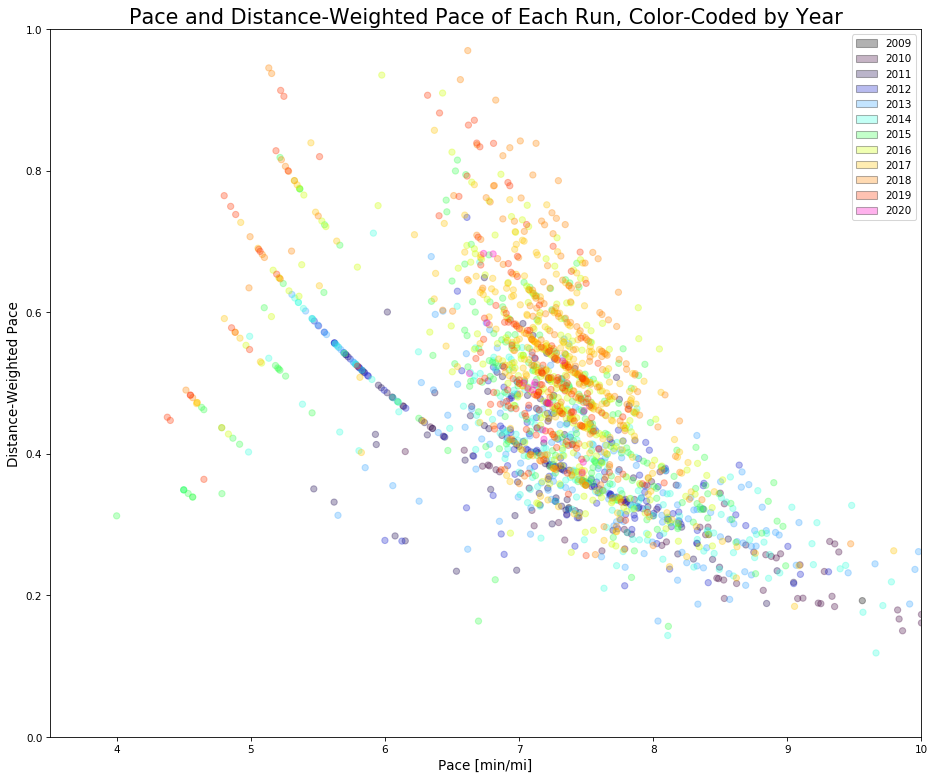

In [67]:
#created a dictionary matching years to color codes and added it to my df as a new column
col_dict = {'2009':'#000000', '2010':'#450842', '2011':'#1B0951', '2012':'#1620CD' , '2013':'#3AA6FF' , '2014':'#3AFFDE' , '2015':'#3AFF51' , '2016':'#D0FF00', '2017':'#FFC600', '2018':'#FF8600', '2019':'#FF3600', '2020':'#FF00C6'}
ymd['colcol'] = ymd['year'].map(col_dict)

#created figure and customized axis limits and labels
fig = plt.figure(figsize=(15,12.5),dpi=75)
plt.xticks(np.arange(0, max(d['Mileage'])+1, 1.0))
plt.xlim(3.5,10)
plt.ylim(0, 1)
ax = fig.gca()
ax.scatter(ymd['pace_min'],ymd['wPace'],c=ymd['colcol'],alpha=0.3)
ax.set_xlabel('Pace [min/mi]', fontsize=13)
ax.set_ylabel('Distance-Weighted Pace', fontsize=13)
ax.set_title('Pace and Distance-Weighted Pace of Each Run, Color-Coded by Year', fontsize=20)

#mapped colors used in the chart onto the legend
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.3) for key, value in col_dict.items()]
ax.legend(handles = leg_el)

In [148]:
test = ymd
test['wPace.2'] = 10*test['wPace']/test['pace_min']**2
print(test)
test['wPace.2'].describe()

            Date  Mileage time_corr   pace_min  year month day     wPace  \
0     2009-04-25     3.10   0:29:38   9.559140  2009    04  25  0.192683   
1     2009-11-21     3.10   0:22:51   7.370968  2009    11  21  0.324065   
2     2010-01-04     1.30   0:17:00  13.076923  2010    01  04  0.066675   
3     2010-01-05     2.60   0:28:00  10.769231  2010    01  05  0.139033   
4     2010-01-07     2.60   0:28:00  10.769231  2010    01  07  0.139033   
5     2010-01-11     1.30       NaN        NaN  2010    01  11       NaN   
6     2010-01-14     2.60   0:26:00  10.000000  2010    01  14  0.161245   
7     2010-01-16     4.05   0:35:48   8.839506  2010    01  16  0.257556   
8     2010-01-19     2.60   0:24:00   9.230769  2010    01  19  0.189239   
9     2010-01-25     2.66   0:24:15   9.116541  2010    01  25  0.196237   
...          ...      ...       ...        ...   ...   ...  ..       ...   
2404  2020-01-19     9.61   1:04:44   6.736039  2020    01  19  0.683207   
2405  2020-0

count    1844.000000
mean        0.095407
std         0.050191
min         0.003678
25%         0.063153
50%         0.087157
75%         0.113042
max         0.358639
Name: wPace.2, dtype: float64

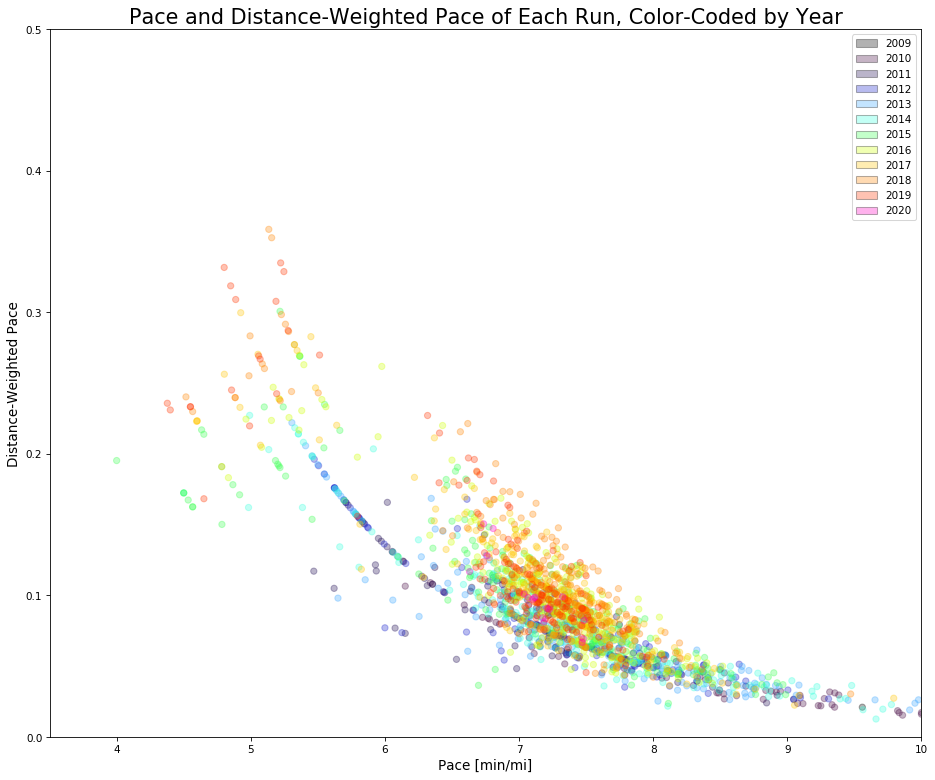

In [149]:
#created a dictionary matching years to color codes and added it to my df as a new column
col_dict = {'2009':'#000000', '2010':'#450842', '2011':'#1B0951', '2012':'#1620CD' , '2013':'#3AA6FF' , '2014':'#3AFFDE' , '2015':'#3AFF51' , '2016':'#D0FF00', '2017':'#FFC600', '2018':'#FF8600', '2019':'#FF3600', '2020':'#FF00C6'}
test['colcol'] = test['year'].map(col_dict)

#created figure and customized axis limits and labels
fig = plt.figure(figsize=(15,12.5),dpi=75)
plt.xticks(np.arange(0, max(test['Mileage'])+1, 1.0))
plt.xlim(3.5,10)
plt.ylim(0, .5)
ax = fig.gca()
ax.scatter(test['pace_min'],test['wPace.2'],c=test['colcol'],alpha=0.3)
ax.set_xlabel('Pace [min/mi]', fontsize=13)
ax.set_ylabel('Distance-Weighted Pace', fontsize=13)
ax.set_title('Pace and Distance-Weighted Pace of Each Run, Color-Coded by Year', fontsize=20)

#mapped colors used in the chart onto the legend
leg_el = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 0.3) for key, value in col_dict.items()]
ax.legend(handles = leg_el)